In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [3]:
maind = np.loadtxt('../proxy/GadgetX_DS_main')
maind = maind[loc,1:]

In [4]:
def sigplot(loc0,lin):
    m_m0 = np.log10(mx[loc0])
    c_c0 = np.log10(cy[loc0])
    covmc = np.cov(m_m0,c_c0)
    print("cc is ",covmc[0,1] / covmc[0,0]**0.5  / covmc[1,1]**0.5)
    xs,ys,zs,siglevel = opd.sigma2dis(m_m0,c_c0,prisig = False)
    plt.contour(np.log10(xs),np.log10(ys),zs,levels = siglevel,linestyles = [lin],colors = 'k')
    
def bootstrap(phy,dty):
    import random
    npp = phy.shape[0]
    Nboot = 100
    bootdata = np.zeros(Nboot)
    for k in range(Nboot):
        Npploc = np.array(random.choices(range(0,npp),k=npp), dtype = np.int64)
        if dty == 'bias':
            bootdata[k] = np.mean(phy[Npploc])
        else:
            bootdata[k] = np.std(phy[Npploc])
    err = np.std(bootdata)
    return err

def bootstrap2(phy1,phy2,dty):
    import random
    npp = phy1.shape[0]
    Nboot = 100
    bootdata = np.zeros(Nboot)
    for k in range(Nboot):
        Npploc = np.array(random.choices(range(0,npp),k=npp), dtype = np.int64)
        if dty == 'bias':
            m1 = np.mean(phy1[Npploc])
            m2 = np.mean(phy2[Npploc])
        else:
            m1 = np.std(phy1[Npploc])
            m2 = np.std(phy2[Npploc])
        bootdata[k] = np.sqrt(m1**2 + m2**2)
    err = np.std(bootdata)
    return err

def plot_setting():
#     plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in', labelsize = 11)
    bwith = 1.2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
HalfMratio = np.loadtxt('../proxy/Half-mass-radius_ratio')[loc]
eta = maind[:,0]
print(np.min(eta), np.max(eta))
nbin = 8
# xx0 = 0.8
# xx1 = 2.0
xbin = np.linspace(0.6,2.2,nbin + 1)
xx = (xbin[:-1] + xbin[1:]) / 2

mx = mmtrue[loc]
cy = cctrue[loc]

Mbias = np.zeros(nbin)
Cbias = np.zeros(nbin)
Merr = np.zeros(nbin)
Cerr = np.zeros(nbin)

Mbias_err = np.zeros(nbin)
Cbias_err = np.zeros(nbin)
btot_err = np.zeros(nbin)
Merr_err = np.zeros(nbin)
Cerr_err = np.zeros(nbin)
berr_err = np.zeros(nbin)
for i in range(nbin):
    idx = np.where((eta >= xbin[i]) & (eta < xbin[i+1]))[0]
    Mbias[i] = np.mean(np.log10(mx[idx]))
    Cbias[i] = np.mean(np.log10(cy[idx]))
    Merr[i] = np.std(np.log10(mx[idx]))
    Cerr[i] = np.std(np.log10(cy[idx]))
    print(xbin[i].round(2),xbin[i+1].round(2),idx.shape[0])
    
    Mbias_err[i] = bootstrap(np.log10(mx[idx]), dty = 'bias')
    Cbias_err[i] = bootstrap(np.log10(cy[idx]), dty = 'bias')
    btot_err[i] = bootstrap2(np.log10(mx[idx]), np.log10(cy[idx]), dty = 'bias')
    Merr_err[i] = bootstrap(np.log10(mx[idx]), dty = 'err')
    Cerr_err[i] = bootstrap(np.log10(cy[idx]), dty = 'err')
    berr_err[i] = bootstrap2(np.log10(mx[idx]), np.log10(cy[idx]), dty = 'err')

# idx0 = np.where(eta < xx0)[0]
# Mbias = np.append(np.mean(np.log10(mx[idx0])), Mbias)
# Cbias = np.append(np.mean(np.log10(cy[idx0])), Cbias)
# Merr = np.append(np.std(np.log10(mx[idx0])), Merr)
# Cerr = np.append(np.std(np.log10(cy[idx0])), Cerr)
# xx = np.append(np.mean(eta[idx0]),xx)
# print(idx0.shape)

idx1 = np.where(eta > 2.2)[0]
Mbias = np.append(Mbias,np.mean(np.log10(mx[idx1])))
Cbias = np.append(Cbias, np.mean(np.log10(cy[idx1])))
Mbias_err = np.append(Mbias_err,bootstrap(np.log10(mx[idx1]), dty = 'bias'))
Cbias_err = np.append(Cbias_err,bootstrap(np.log10(cy[idx1]), dty = 'bias'))
btot_err = np.append(btot_err,bootstrap2(np.log10(mx[idx1]), np.log10(cy[idx1]), dty = 'bias'))

Merr = np.append(Merr, np.std(np.log10(mx[idx1])))
Cerr = np.append(Cerr, np.std(np.log10(cy[idx1])))
Merr_err = np.append(Merr_err,bootstrap(np.log10(mx[idx1]), dty = 'err'))
Cerr_err = np.append(Cerr_err,bootstrap(np.log10(cy[idx1]), dty = 'err'))
berr_err = np.append(btot_err,bootstrap2(np.log10(mx[idx1]), np.log10(cy[idx1]), dty = 'err'))

xx = np.append(xx,np.mean(eta[idx1]))
print(idx1.shape)

b_tot = np.sqrt(Mbias**2+Cbias**2)
err_tot = np.sqrt(Merr**2+Cerr**2)


0.6194200723092502 3.430826607718015
0.6 0.8 2
0.8 1.0 35
1.0 1.2 196
1.2 1.4 50
1.4 1.6 14
1.6 1.8 5
1.8 2.0 4
2.0 2.2 2
(2,)


In [13]:
def plot_Mc(xx,M,C,tot,Merr,Cerr,toterr,lab,ylimit):
    idx = xx > 0.8
    plt.errorbar(xx[idx], M[idx], yerr = Merr[idx], ls = 'none', mfc = 'none', mew = 1.5,
                 capsize = 2, marker = 'o', c = 'b', label = lab[0])
    plt.errorbar(xx[idx], C[idx], yerr = Cerr[idx], ls = 'none', mfc = 'none',  mew = 1.5,
                 capsize = 2, marker = 'o', c = 'r', label = lab[1])
    plt.errorbar(xx[idx], tot[idx], yerr = toterr[idx], ls = 'none', mfc = 'none',  mew = 1.5,
                capsize = 2, marker = 'o', c = 'k', label = lab[2])

    idx = xx <0.8
    plt.errorbar(xx[idx], M[idx], yerr = Merr[idx], ls = 'none', mfc = 'none', mew = 1.5,
                 capsize = 2, marker = 'o', c = 'b', alpha = 0.4)
    plt.errorbar(xx[idx], C[idx], yerr = Cerr[idx], ls = 'none', mfc = 'none',  mew = 1.5,
                 capsize = 2, marker = 'o', c = 'r', alpha = 0.4)
    plt.errorbar(xx[idx], tot[idx], yerr = toterr[idx], ls = 'none', mfc = 'none',  mew = 1.5,
                capsize = 2, marker = 'o', c = 'k', alpha = 0.4)

    plot_setting()
    plt.legend()
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_xscale('linear')
    ax.set_xlim((0.6, 2.0))
    ax.set_ylim((ylimit[0], ylimit[1]))

    

<IPython.core.display.Javascript object>


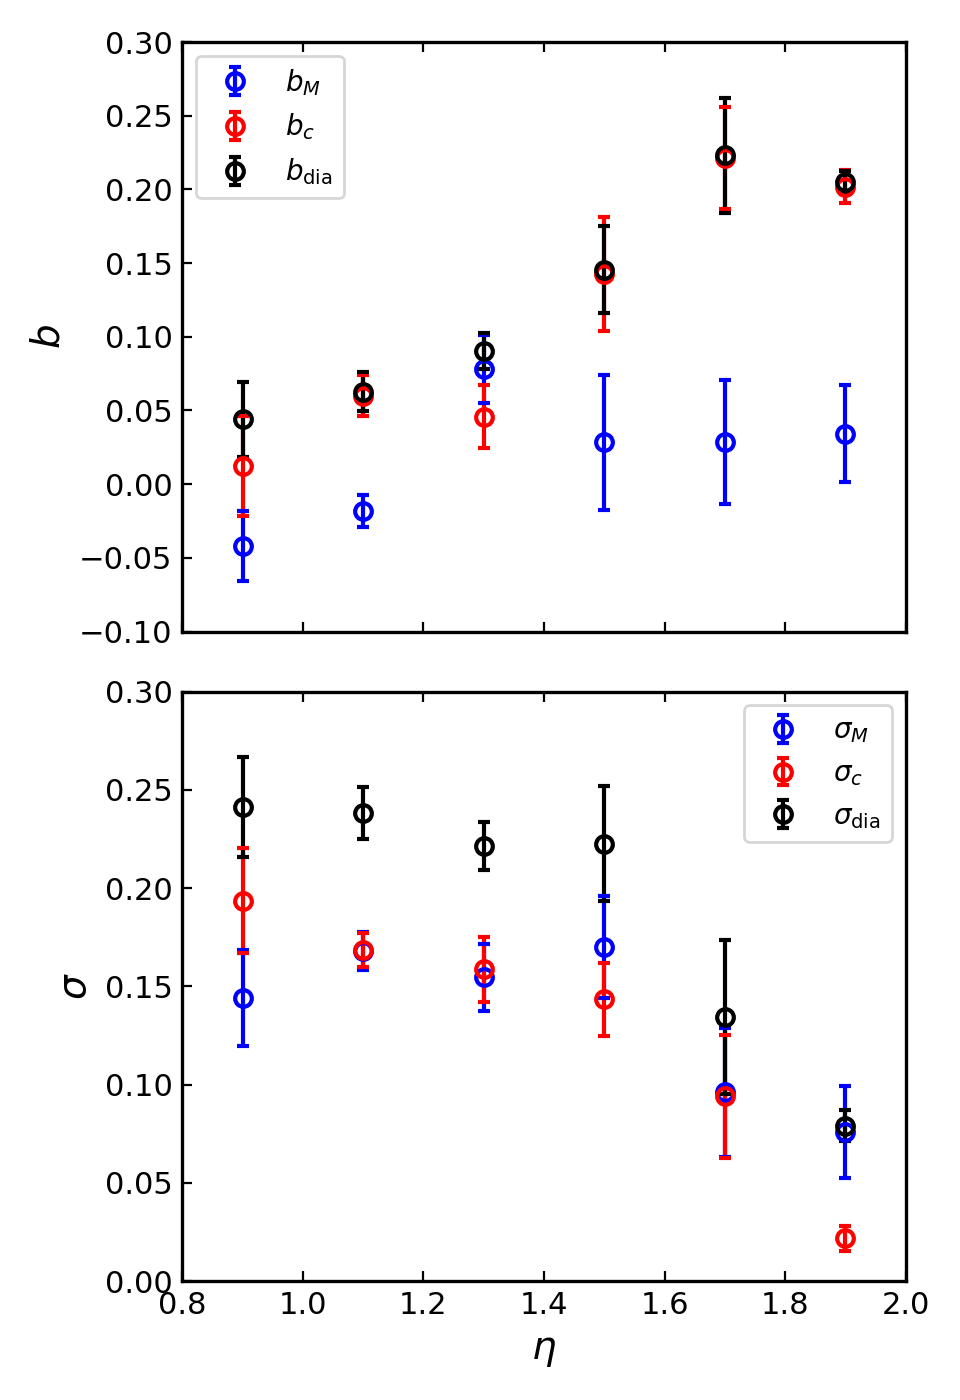

No handles with labels found to put in legend.


In [15]:
plt.figure(figsize = (4.8,7))

plt.subplot(211)
lab = [r'$b_M$', r'$b_c$', r'$b_{\rm dia}$']
plt.ylabel('$b$', fontsize = 14)
plt.tick_params(top = 'on', right = 'off', 
                labelbottom = False, which='both', direction = 'in', labelsize = 11)
plot_Mc(xx,Mbias,Cbias,b_tot,Mbias_err,Cbias_err,btot_err,lab,ylimit = [-0.22,0.3])
ax = plt.gca()
ax.set_xticklabels([])
plt.xlim(0.8,2.0)
plt.ylim(-0.1,0.3)

# plt.plot(xx, Mbias, lw = 2, c = 'b', label = r'$b_M$')
# plt.plot(xx, Cbias, lw = 2, c = 'r', label = r'$b_c$')
# plt.plot(xx, b_tot, lw = 2, c = 'k',label = r'$b_{\rm tot}$')
#=====================================
#plot sigma distribution
#=====================================

plt.subplot(212)
# plt.plot(xx, Merr, lw = 2, c = 'b', ls = '--', label = r'$\sigma_M$')
# plt.plot(xx, Cerr, lw = 2, c = 'r', ls = '--', label = r'$\sigma_c$')
# plt.plot(xx, err_tot, lw = 2, c = 'k', ls = '--', label = r'$\sigma_{\rm tot}$')

plt.legend(ncol = 1)
lab = [r'$\sigma_M$', r'$\sigma_c$', r'$\sigma_{\rm dia}$']
plt.tick_params(top = 'on', right = 'off', 
                 which='both', direction = 'in', labelsize = 11)
plt.xlabel(r'$\eta$', fontsize = 14)
plt.ylabel('$\sigma$', fontsize = 14)
# ax = plt.gca()
# ax.xaxis.set_label_coords(0.6, -0.09)
plot_Mc(xx,Merr,Cerr,err_tot,Merr_err,Cerr_err,btot_err,lab,ylimit = [0,0.3])
plt.xlim(0.8,2.0)

plt.tight_layout()

plt.savefig('./figs/bias.pdf')